In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_train_users = pd.read_csv("/content/train_users_2.csv")
df_train_users.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [ ]:
df_train_users.count()

id                         213451
date_account_created       213451
timestamp_first_active     213451
date_first_booking          88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 
 

* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
* first_affiliate_tracked: whats the first marketing the user interacted with  before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict

In [ ]:
df_train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [ ]:
df_train_users.isnull().sum()
#df_train_users['gender'].value_counts()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [ ]:
df_train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


##### part1

In [ ]:
# date_first_booking         
# age
# signup_app                      

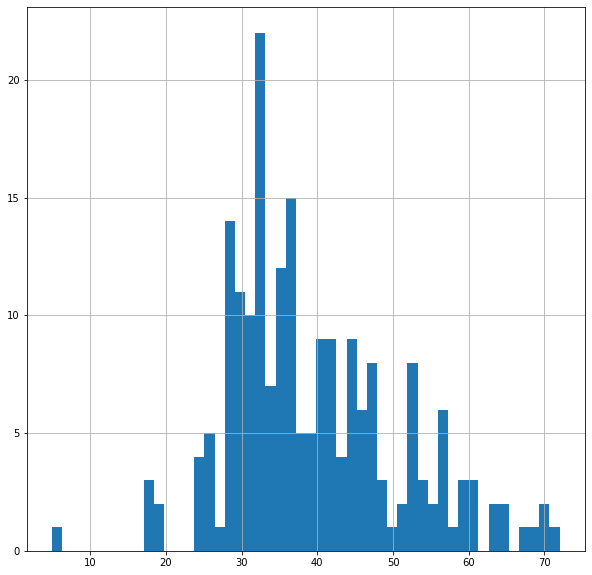

In [ ]:
df_train_users['age'].head(350).hist(bins=50)
# age ranges 5 to 75 and some high outliers of 2000
# age follows a normal distribution neglecting the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


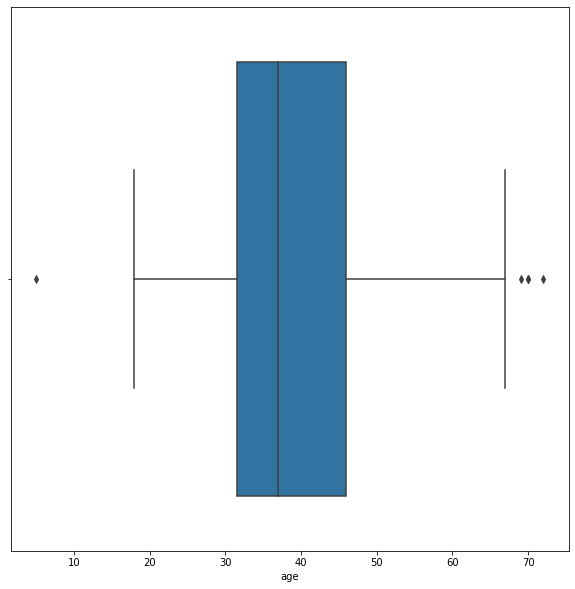

In [ ]:

sns.boxplot(df_train_users['age'].head(350))

# obvious outliers, values < 17 and > 67

In [ ]:
df_train_users['age'].isnull().sum()
# 77135 null values out of 190k

87990

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


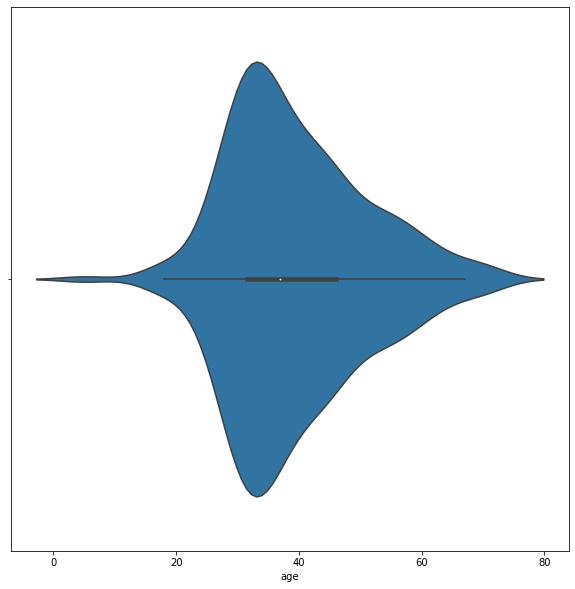

In [ ]:
sns.violinplot(df_train_users['age'].head(350))

In [ ]:
# df_train_users['age']=df_train_users['age'].replace(np.NaN,df_train_users['age'].median())

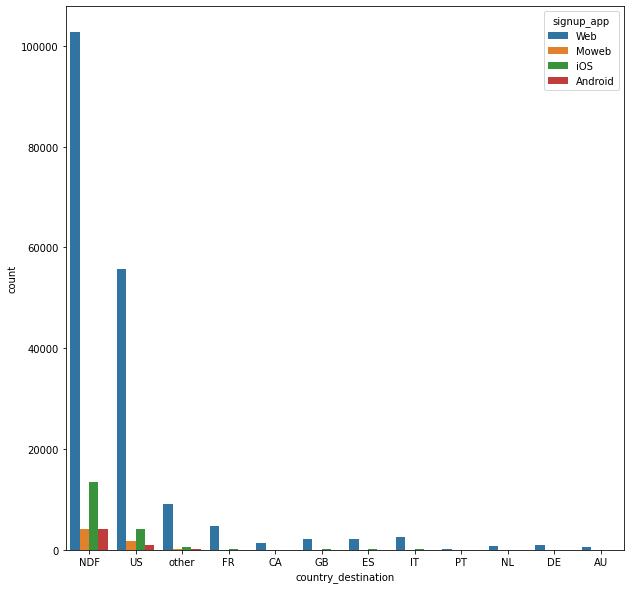

In [ ]:
sns.countplot(x='country_destination', hue='signup_app' ,data=df_train_users)
# people who booked from US and who hasn't booked used Web. 

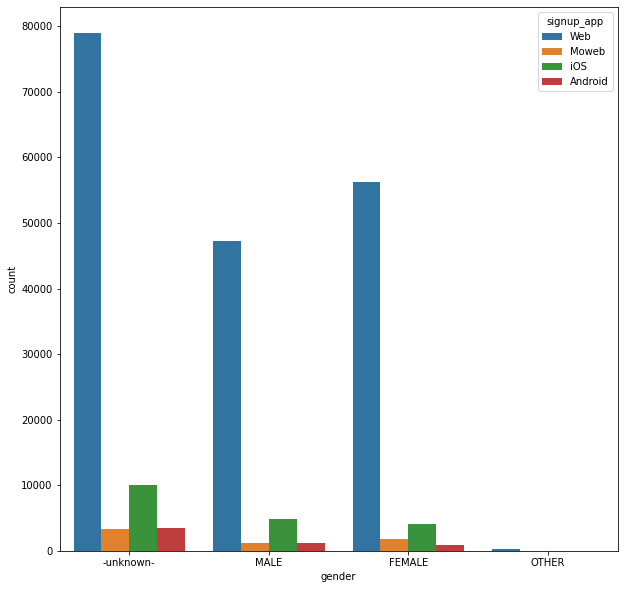

In [ ]:
sns.countplot(x='gender', hue='signup_app' ,data=df_train_users)
# most males and females use WEB

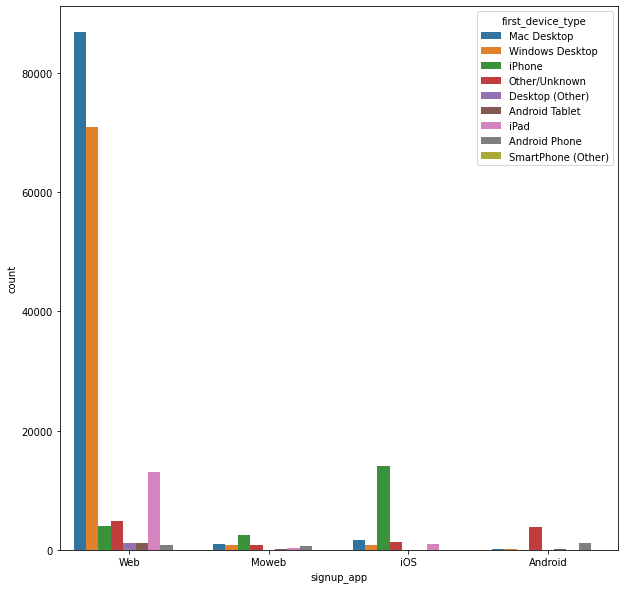

In [ ]:
sns.countplot(x='signup_app', hue='first_device_type' ,data=df_train_users)
# most Web users used Mac and Windows

##### part1



---



---



##### part2 


In [ ]:
#timestamp_first_active--done
#signup_method--done
#first_device_type--done
#country_destination--done

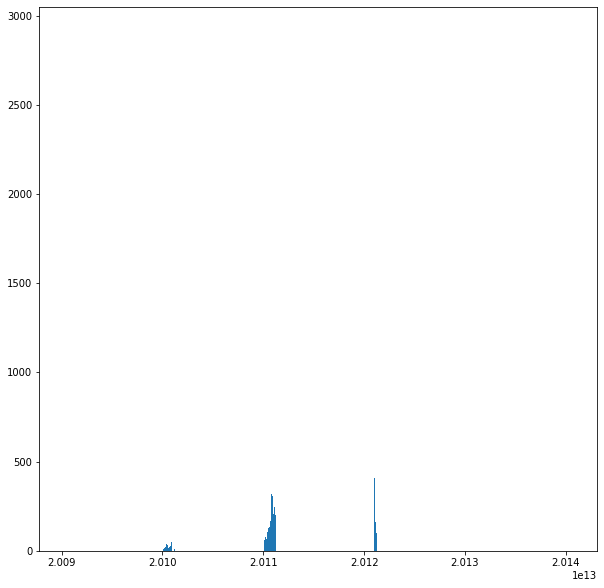

In [ ]:
abdo_data=df_train_users
plt.hist(abdo_data.timestamp_first_active, bins = 10000)
plt.show()

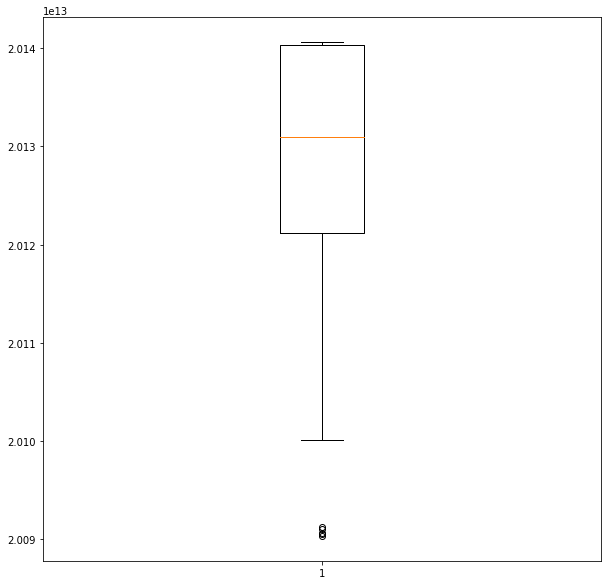

In [ ]:

# Creating plot
plt.boxplot(abdo_data.timestamp_first_active)
 
# show plot
plt.show()

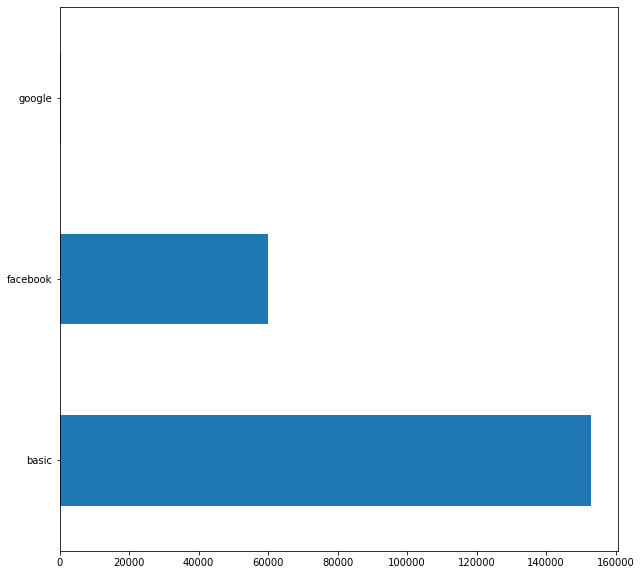

In [ ]:
signup=abdo_data.signup_method
f = signup.dropna(how='any',axis=0)
signup.value_counts()[:].plot(kind='barh')


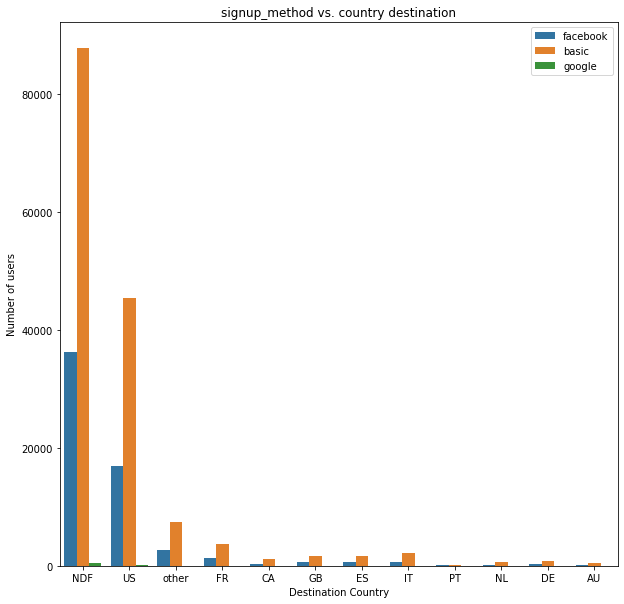

In [ ]:
abdo_data.dropna(subset = ['country_destination'])
sns.countplot(x='country_destination', data=abdo_data, hue='signup_method')
plt.title('signup_method vs. country destination')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('signup_method vs. country destination')
plt.legend(loc = 'upper right')
plt.show()
# most people who booked in Us then basic sign up then with facebook
# most people who hasn't booked signed up with basic and then facebook

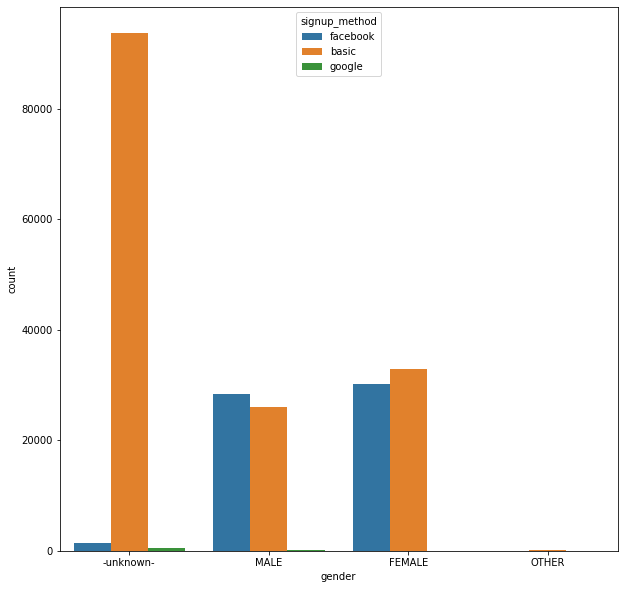

In [ ]:
sns.countplot(x='gender', hue='signup_method' ,data=df_train_users)

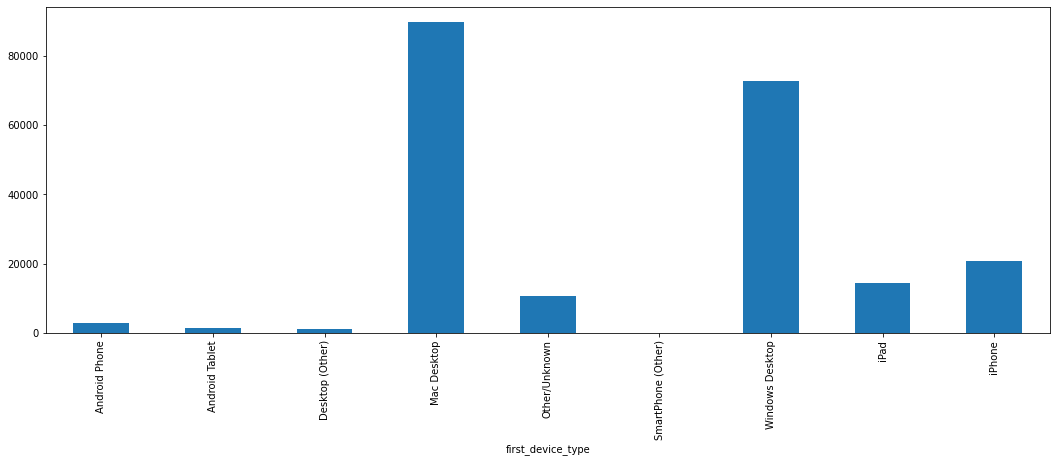

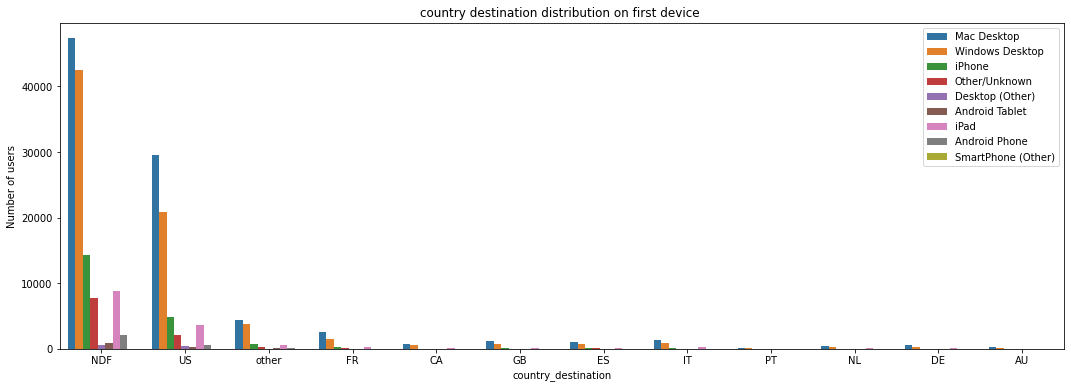

In [ ]:
plt.figure(figsize=(18,6))
abdo_data.groupby("first_device_type")['id'].count().plot.bar()
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=abdo_data, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('country destination distribution on first device ')
plt.legend(loc = 'upper right')
plt.show()

No handles with labels found to put in legend.


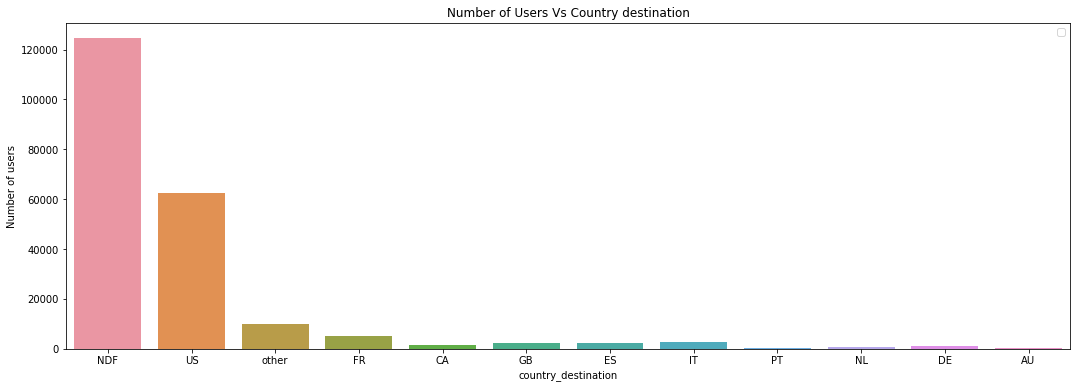

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=abdo_data)
plt.ylabel('Number of users')
plt.title('Number of Users Vs Country destination')
plt.legend(loc = 'upper right')
plt.show()

##### part2 



---



---



##### part3

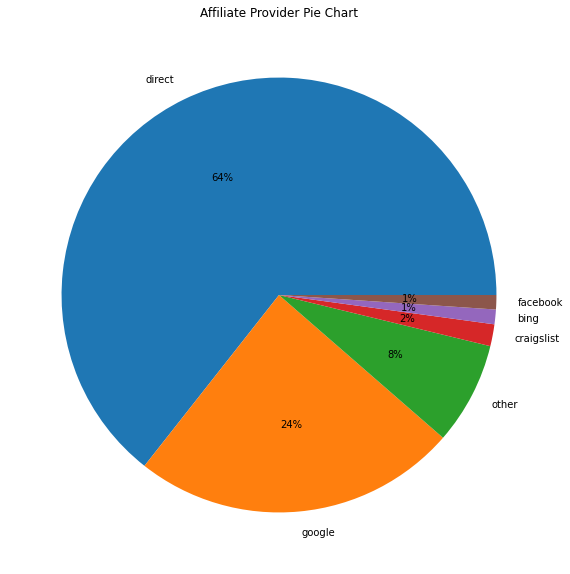

In [ ]:
#affiliate_channel        
#affiliate_provider       
#first_affiliate_tracked 

pie_data = df_train_users.affiliate_provider.value_counts()
pie_data['other'] += pie_data[6:].sum()
pie_data = pie_data[:6]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_data.index, autopct=lambda p: f'{p:.0f}%')
plt.title('Affiliate Provider Pie Chart')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

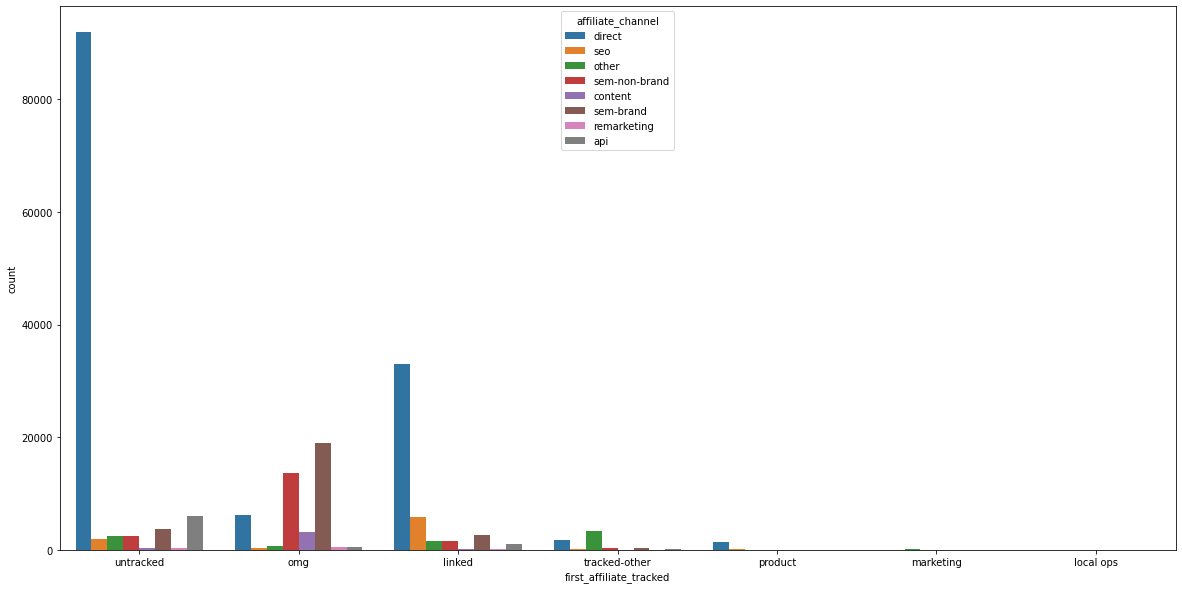

In [ ]:
sns.countplot(x='first_affiliate_tracked', hue='affiliate_channel', data=df_train_users)
plt.show()

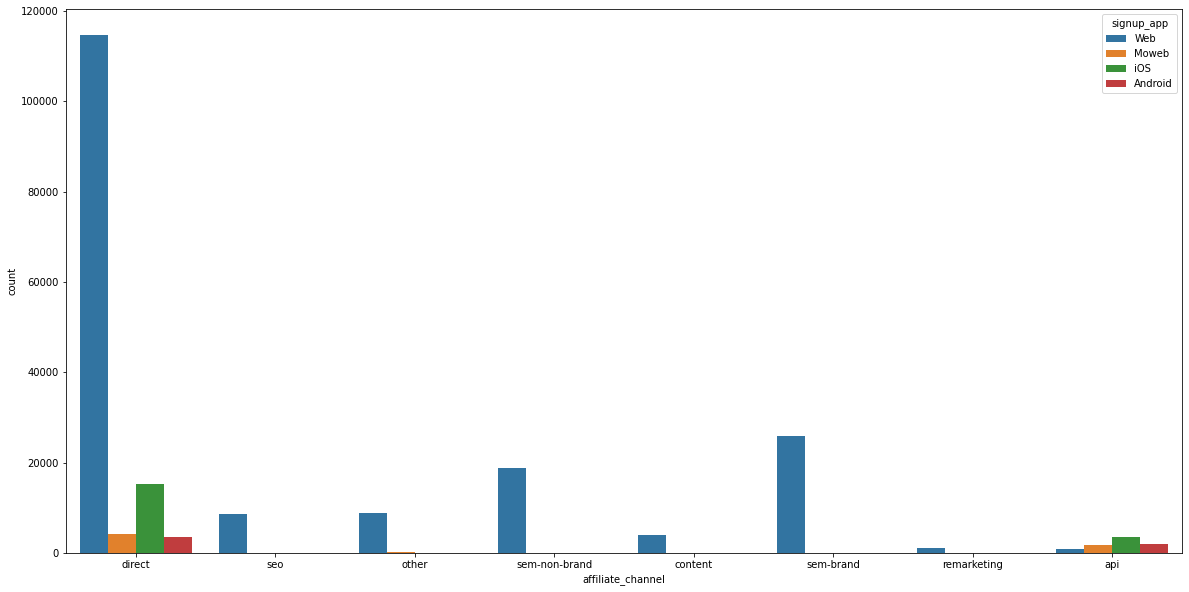

In [ ]:
sns.countplot(x='affiliate_channel', hue='signup_app', data=df_train_users)
plt.show()



---



---



##### part3

##### part4

In [ ]:
#Cells:
#Language
#Gender
#first_browser

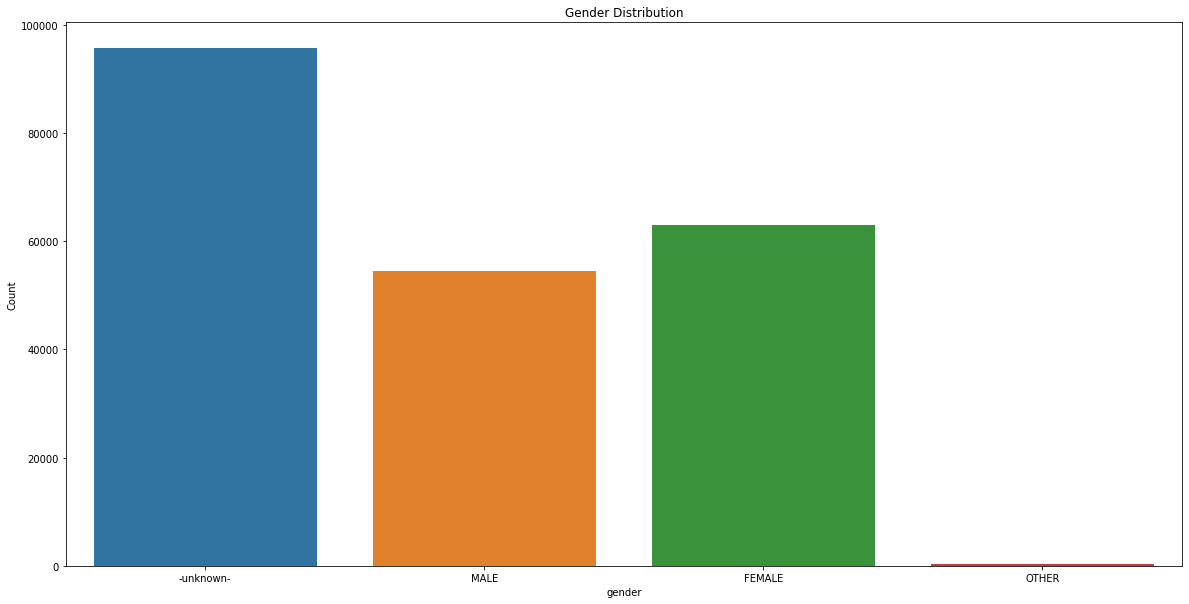

In [ ]:
sns.countplot(x='gender',data=df_train_users)
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [ ]:
# We can see that there is a lot of unknown gender data in this dataset
# And the gender representation between Females and Males are almost identical

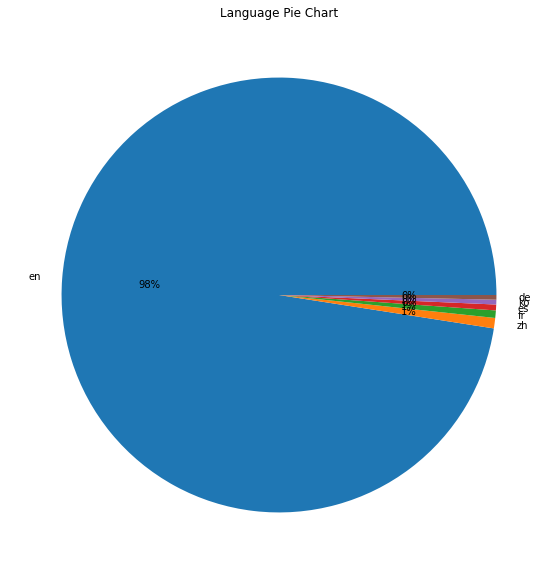

In [ ]:

pie_data = df_train_users.language.value_counts()
pie_data = pie_data[:6]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_data.index, autopct=lambda p: f'{p:.0f}%')
plt.title('Language Pie Chart')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


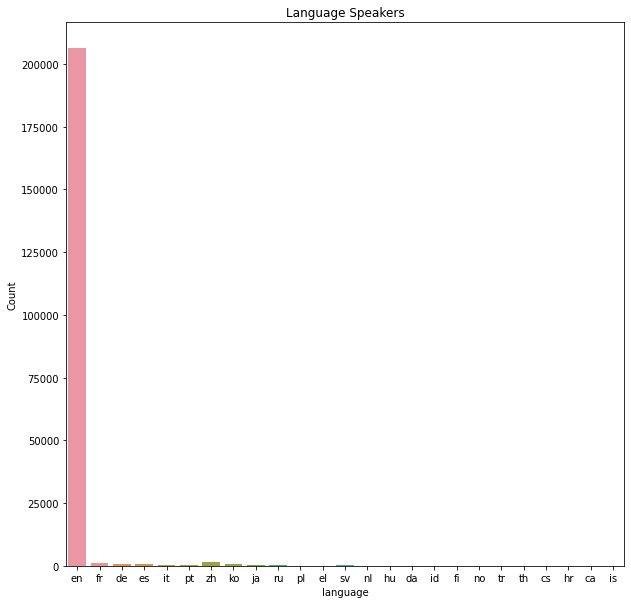

In [ ]:
sns.countplot(x='language',data=df_train_users)
plt.ylabel('Count')
plt.title('Language Speakers')
plt.show()


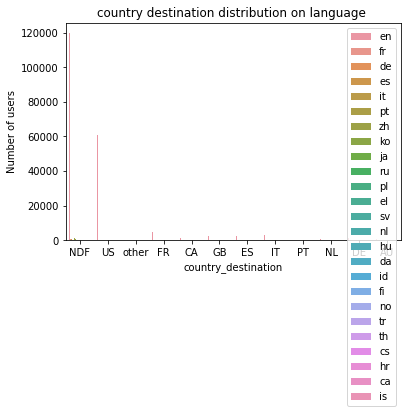

In [ ]:
sns.countplot(x='country_destination', data=df_train_users, hue='language')
plt.ylabel('Number of users')
plt.title('country destination distribution on language ')
plt.legend(loc = 'upper right')
plt.show()

##### part4



---



---





---



---

